<H1>Task 2: Predictive modeling of customer bookings</H1>

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import sklearn
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance, plot_tree

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

!pip install tpot
from tpot import TPOTClassifier, TPOTRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

!pip install pickle
import pickle
from pickle import dump, load

# Use Folium library to plot values on a map.
!pip install folium
import folium


!pip install pycaret
from pycaret.classification import *
from pycaret.clustering import *
from pycaret.regression import *

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

C:\Users\samid\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Autosaving every 60 seconds


C:\Users\samid\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [3]:
df = pd.read_csv("train.csv")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,1,262,19,6,1,0,0,5.52,0
1,1,0,1,112,20,6,0,0,0,5.52,0
2,2,0,1,243,22,3,1,1,0,5.52,0
3,1,0,1,96,31,6,0,0,1,5.52,0
4,2,0,1,68,22,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,1,27,6,6,1,0,1,5.62,0
49996,1,0,1,111,6,7,0,0,0,5.62,0
49997,1,0,1,24,6,6,0,0,1,5.62,0
49998,1,0,1,15,6,1,1,0,1,5.62,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_day             50000 non-null  int64  
 6   wants_extra_baggage    50000 non-null  int64  
 7   wants_preferred_seat   50000 non-null  int64  
 8   wants_in_flight_meals  50000 non-null  int64  
 9   flight_duration        50000 non-null  float64
 10  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 4.2 MB


In [5]:
df.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,1.59,0.11,1.01,84.94,23.04,3.81,0.67,0.30,0.43,7.28,0.15
std,1.02,0.32,0.13,90.45,33.89,1.99,0.47,0.46,0.49,1.50,0.36
min,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,4.67,0.00
25%,1.00,0.00,1.00,21.00,5.00,2.00,0.00,0.00,0.00,5.62,0.00
50%,1.00,0.00,1.00,51.00,17.00,4.00,1.00,0.00,0.00,7.57,0.00
75%,2.00,0.00,1.00,115.00,28.00,5.00,1.00,1.00,1.00,8.83,0.00
max,9.00,1.00,3.00,867.00,778.00,7.00,1.00,1.00,1.00,9.50,1.00


In [6]:
df.shape

(50000, 11)

In [7]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete'], dtype='object')

<h4> Univariate Data Exploration </h4>

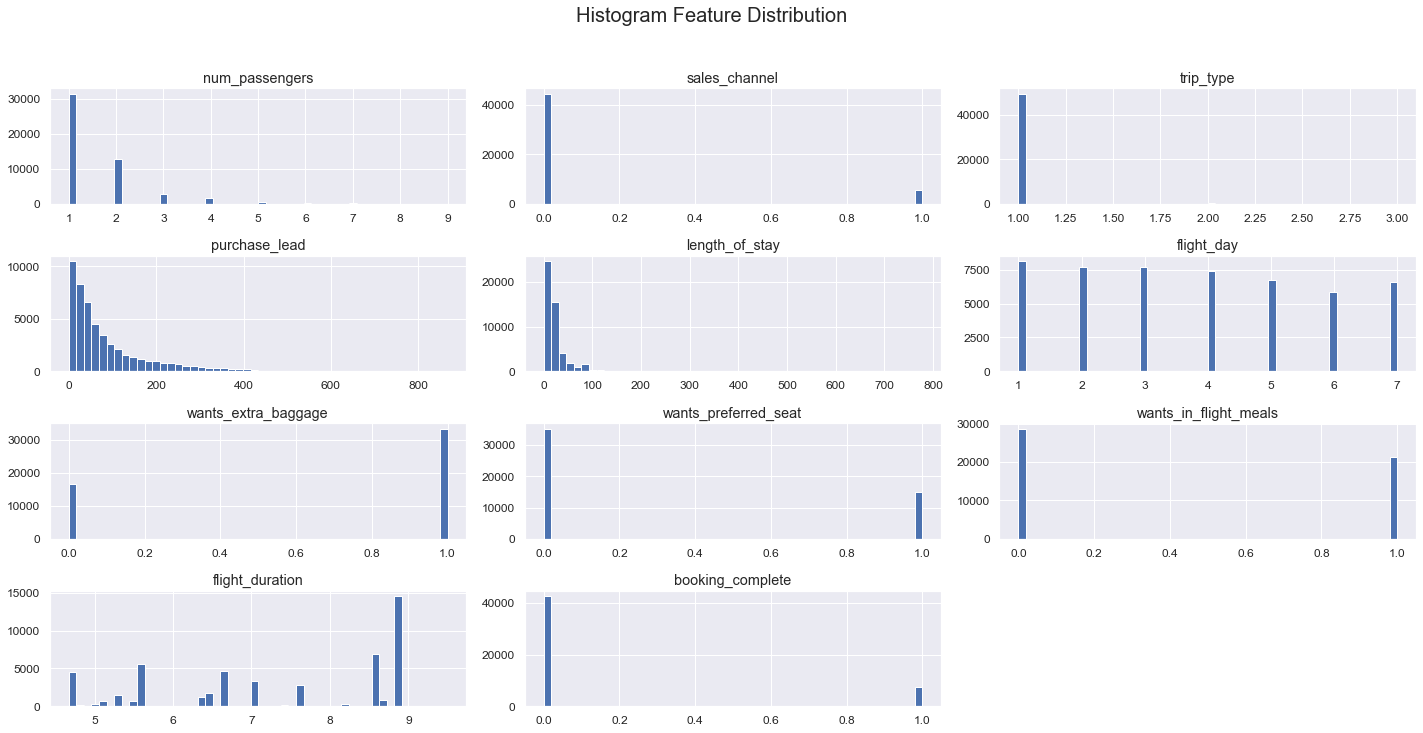

In [8]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

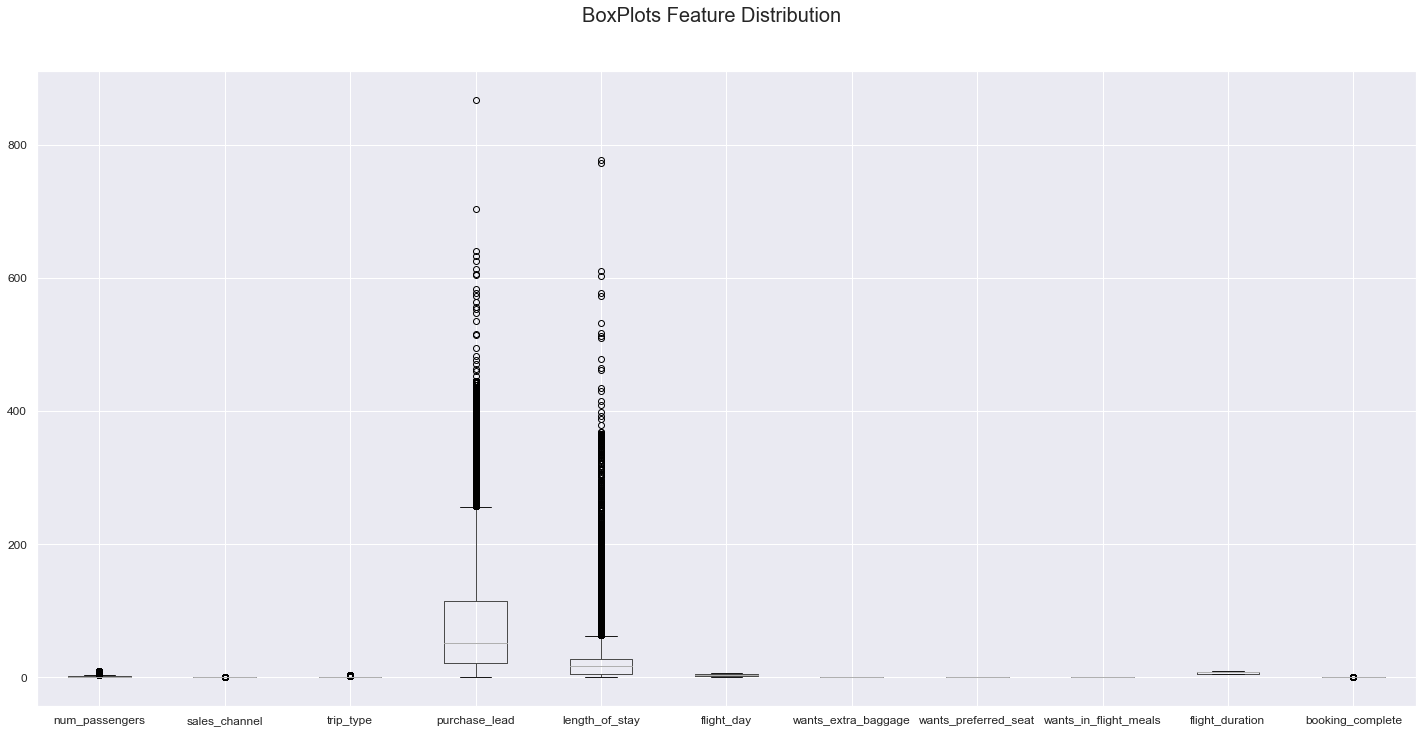

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

<h4>Time-Series Analysis</h4>

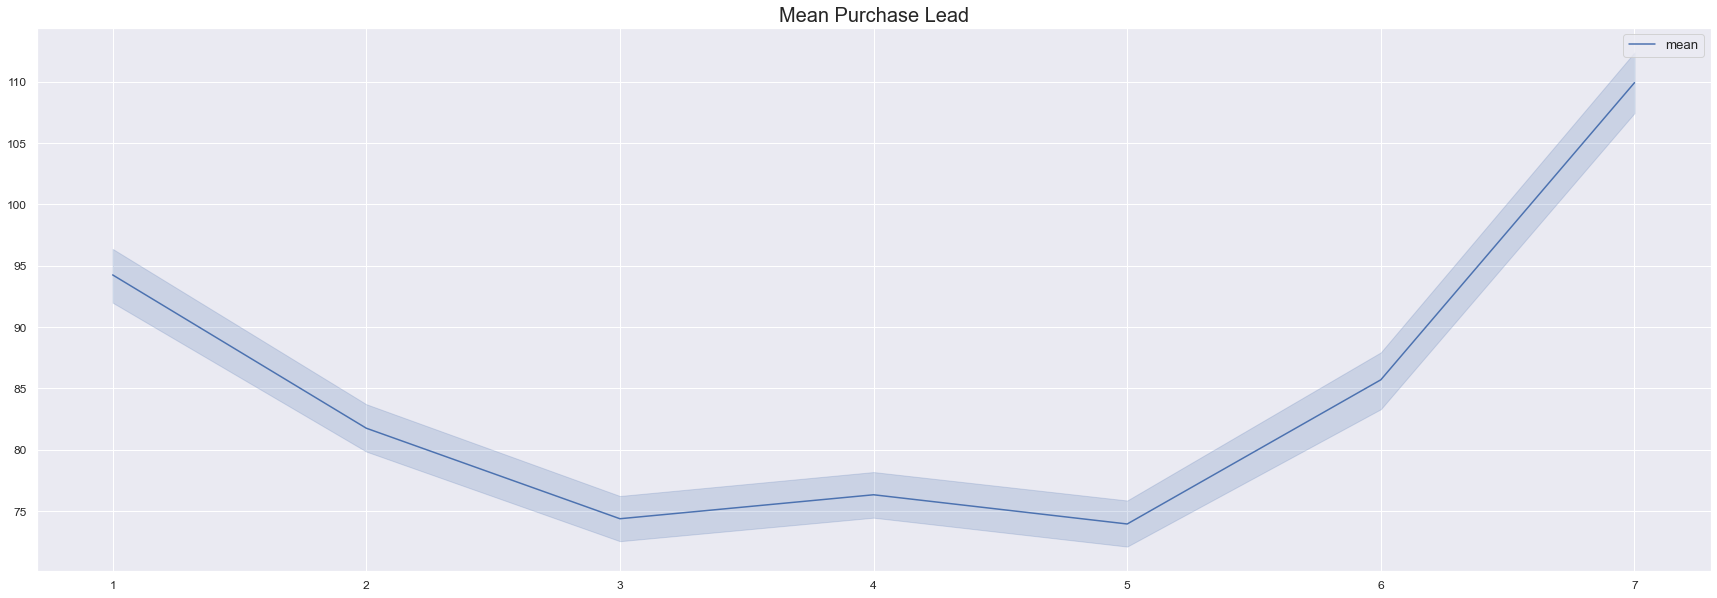

In [10]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.flight_day,y=df.purchase_lead,data=df, estimator="mean")
plt.title("Mean Purchase Lead", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['mean'])
plt.show()

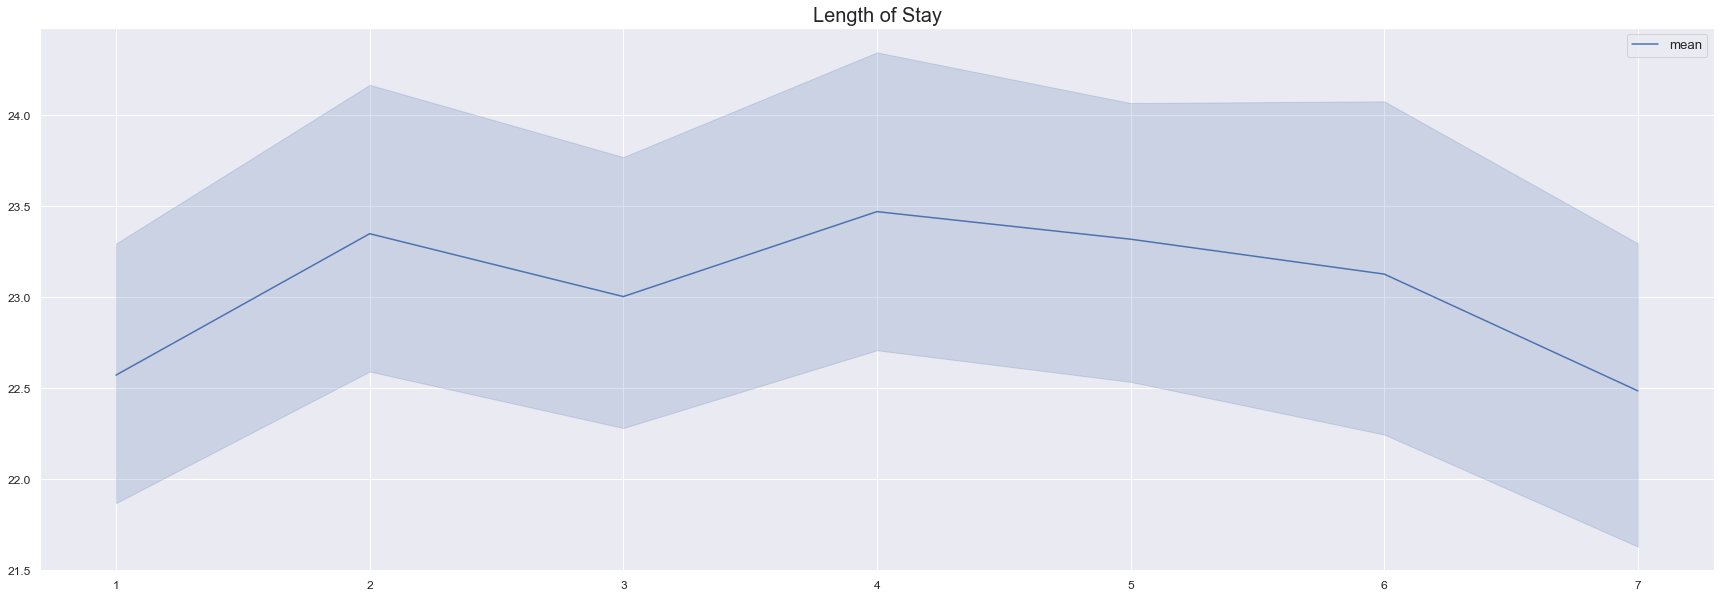

In [11]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.flight_day,y=df.length_of_stay,data=df, estimator='mean')
plt.title("Length of Stay", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['mean'])
plt.show()

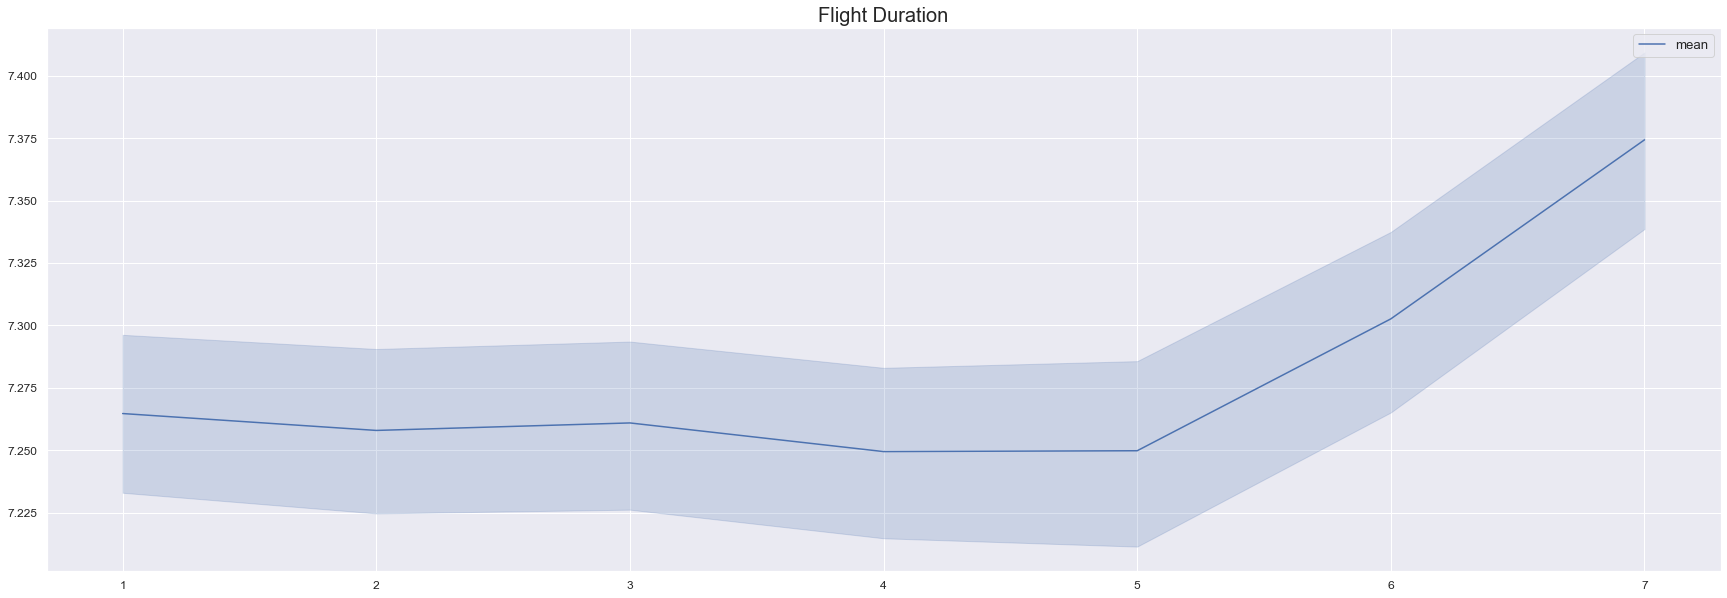

In [12]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.flight_day,y=df.flight_duration,data=df, estimator='mean')
plt.title("Flight Duration", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['mean'])
plt.show()

<h4> Correlation </h4>

In [13]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.00,-0.00,-0.00,0.21,-0.12,0.02,0.12,0.03,0.02,-0.06,0.02
sales_channel,-0.00,1.00,-0.02,-0.01,-0.06,0.04,-0.05,0.03,-0.02,-0.04,-0.04
trip_type,-0.00,-0.02,1.00,0.01,-0.01,0.00,0.01,-0.01,-0.01,0.04,-0.03
purchase_lead,0.21,-0.01,0.01,1.00,-0.08,0.04,-0.02,-0.00,-0.02,0.07,-0.02
length_of_stay,-0.12,-0.06,-0.01,-0.08,1.00,-0.00,0.18,0.03,0.10,0.14,-0.04
flight_day,0.02,0.04,0.00,0.04,-0.00,1.00,-0.00,0.01,0.01,0.02,-0.01
wants_extra_baggage,0.12,-0.05,0.01,-0.02,0.18,-0.00,1.00,0.21,0.22,0.06,0.07
wants_preferred_seat,0.03,0.03,-0.01,-0.00,0.03,0.01,0.21,1.00,0.32,0.10,0.05
wants_in_flight_meals,0.02,-0.02,-0.01,-0.02,0.10,0.01,0.22,0.32,1.00,0.15,0.03
flight_duration,-0.06,-0.04,0.04,0.07,0.14,0.02,0.06,0.10,0.15,1.00,-0.11


In [14]:
df.corr()["booking_complete"].sort_values()

flight_duration         -0.11
length_of_stay          -0.04
sales_channel           -0.04
trip_type               -0.03
purchase_lead           -0.02
flight_day              -0.01
num_passengers           0.02
wants_in_flight_meals    0.03
wants_preferred_seat     0.05
wants_extra_baggage      0.07
booking_complete         1.00
Name: booking_complete, dtype: float64

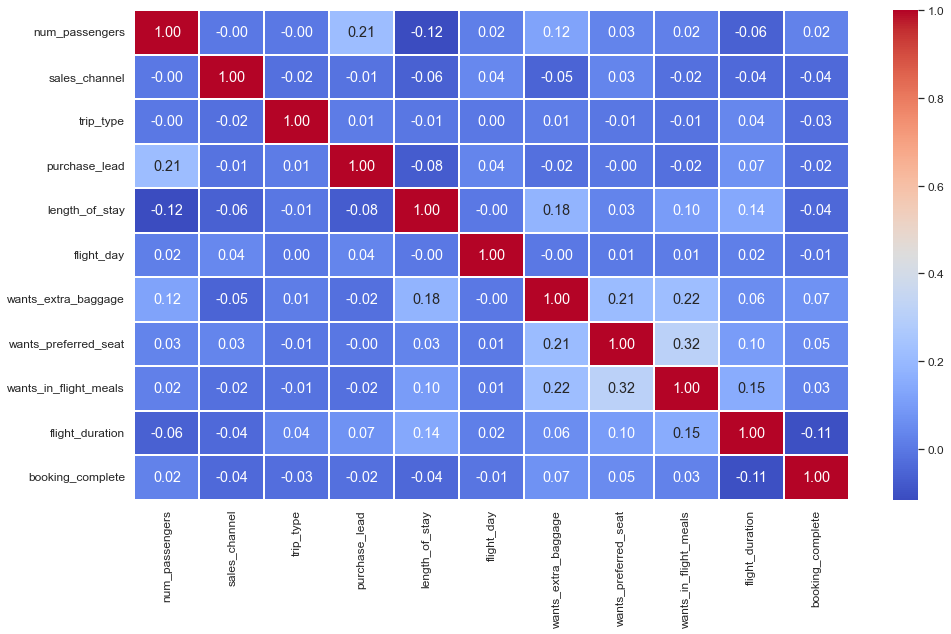

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

<h4> Pairplots </h4>

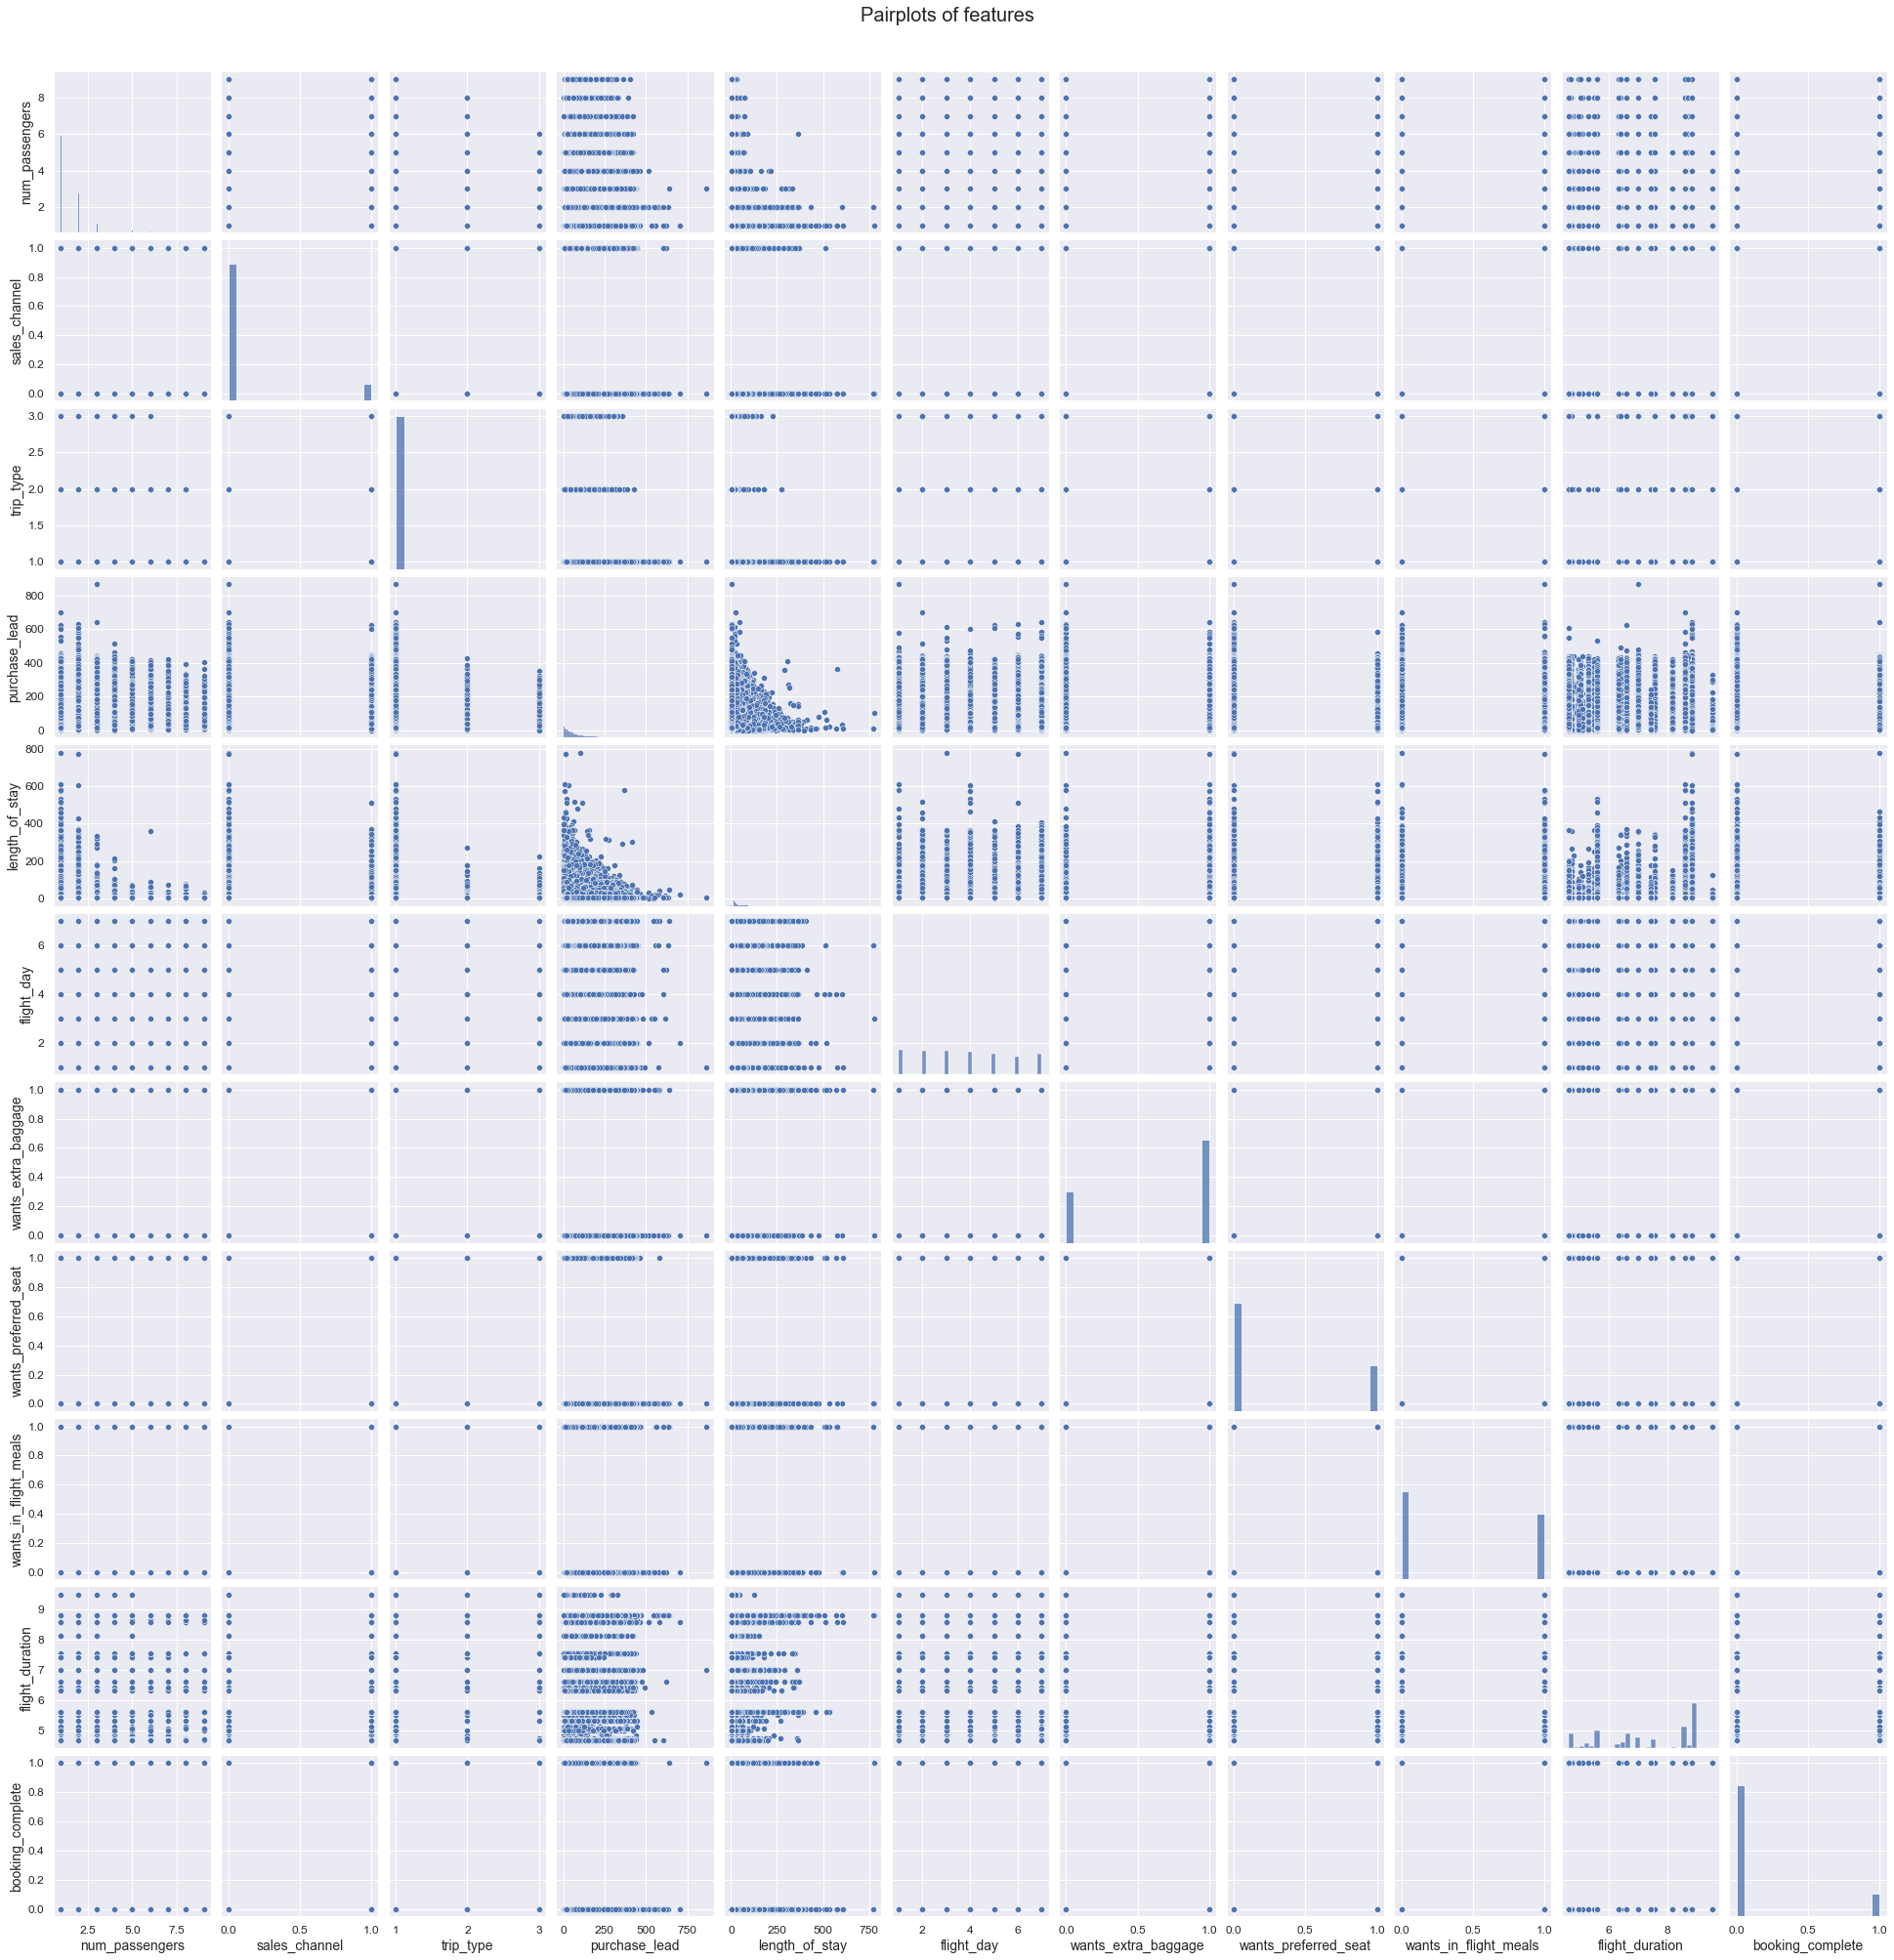

In [16]:
sns.pairplot(df)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

<h4>Treat Missing Values</h4>

In [17]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

<h4> Treat Duplicate Values </h4>

In [18]:
df.duplicated(keep='first').sum()

1504

In [19]:
#Check duplicate values
df[df.duplicated(keep=False)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
89,1,0,1,34,24,5,1,0,0,8.83,0
115,1,0,1,65,278,4,0,0,0,8.83,0
117,1,0,1,263,58,7,0,1,0,8.83,0
122,1,0,1,42,17,2,0,0,0,8.83,1
135,4,0,1,366,17,7,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...
49934,1,0,1,2,6,4,0,0,1,4.67,0
49944,1,0,1,2,6,4,0,0,1,4.67,0
49958,4,1,1,108,6,1,1,0,1,4.67,0
49961,1,0,1,30,6,4,0,0,0,4.67,0


<h4> Treat Data Types </h4>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_day             50000 non-null  int64  
 6   wants_extra_baggage    50000 non-null  int64  
 7   wants_preferred_seat   50000 non-null  int64  
 8   wants_in_flight_meals  50000 non-null  int64  
 9   flight_duration        50000 non-null  float64
 10  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 4.2 MB


<h4> Train Test Split </h4>

In [21]:
df = pd.read_csv("train.csv")
X = df.iloc[:,0:10]
y = df.iloc[:,10:]

In [22]:
X.values, y.values

(array([[2.  , 0.  , 1.  , ..., 0.  , 0.  , 5.52],
        [1.  , 0.  , 1.  , ..., 0.  , 0.  , 5.52],
        [2.  , 0.  , 1.  , ..., 1.  , 0.  , 5.52],
        ...,
        [1.  , 0.  , 1.  , ..., 0.  , 1.  , 5.62],
        [1.  , 0.  , 1.  , ..., 0.  , 1.  , 5.62],
        [1.  , 0.  , 1.  , ..., 1.  , 0.  , 5.62]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int64))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 10), (10000, 10), (40000, 1), (10000, 1))

<h3> Model Training </h3>

In [24]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 30, 
                           n_jobs=-1, scoring='accuracy')
# randm.fit(X, y)
# randm.best_estimator_
# randm.best_score_
# randm.best_params_

In [25]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=50)

[0]	validation_0-error:0.15180
[1]	validation_0-error:0.15190
[2]	validation_0-error:0.15180
[3]	validation_0-error:0.15140
[4]	validation_0-error:0.15130
[5]	validation_0-error:0.15160
[6]	validation_0-error:0.15140
[7]	validation_0-error:0.15140
[8]	validation_0-error:0.15160
[9]	validation_0-error:0.15170
[10]	validation_0-error:0.15170
[11]	validation_0-error:0.15180
[12]	validation_0-error:0.15160
[13]	validation_0-error:0.15170
[14]	validation_0-error:0.15170
[15]	validation_0-error:0.15160
[16]	validation_0-error:0.15140
[17]	validation_0-error:0.15130
[18]	validation_0-error:0.15130
[19]	validation_0-error:0.15110
[20]	validation_0-error:0.15120
[21]	validation_0-error:0.15110
[22]	validation_0-error:0.15110
[23]	validation_0-error:0.15110
[24]	validation_0-error:0.15130
[25]	validation_0-error:0.15110
[26]	validation_0-error:0.15110
[27]	validation_0-error:0.15120
[28]	validation_0-error:0.15110
[29]	validation_0-error:0.15130
[30]	validation_0-error:0.15150
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [26]:
y_pred = xgbmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<h4> Model evaluation </h4>

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[8481,    6],
       [1505,    8]], dtype=int64)

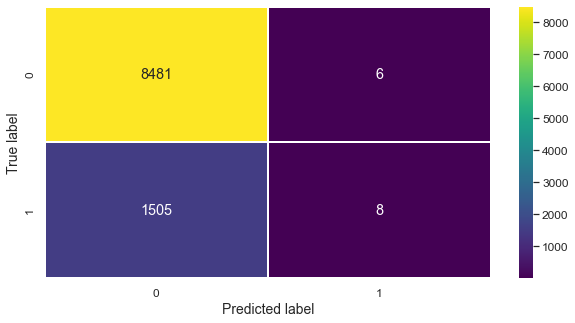

In [28]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8487
           1       0.57      0.01      0.01      1513

    accuracy                           0.85     10000
   macro avg       0.71      0.50      0.46     10000
weighted avg       0.81      0.85      0.78     10000



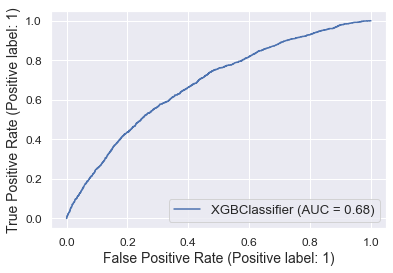

In [30]:
plot_roc_curve(xgbmodel,X_test,y_test)
plt.show()

<h4>Plot Feature Importances</h4>

In [31]:
xgbmodel.feature_importances_

array([0.05912912, 0.10919328, 0.07559661, 0.0616657 , 0.08541386,
       0.05373788, 0.2633194 , 0.09000516, 0.06682168, 0.13511732],
      dtype=float32)

In [32]:
feat_importances = pd.Series(xgbmodel.feature_importances_, index=X.columns)
feat_importances

num_passengers          0.06
sales_channel           0.11
trip_type               0.08
purchase_lead           0.06
length_of_stay          0.09
flight_day              0.05
wants_extra_baggage     0.26
wants_preferred_seat    0.09
wants_in_flight_meals   0.07
flight_duration         0.14
dtype: float32

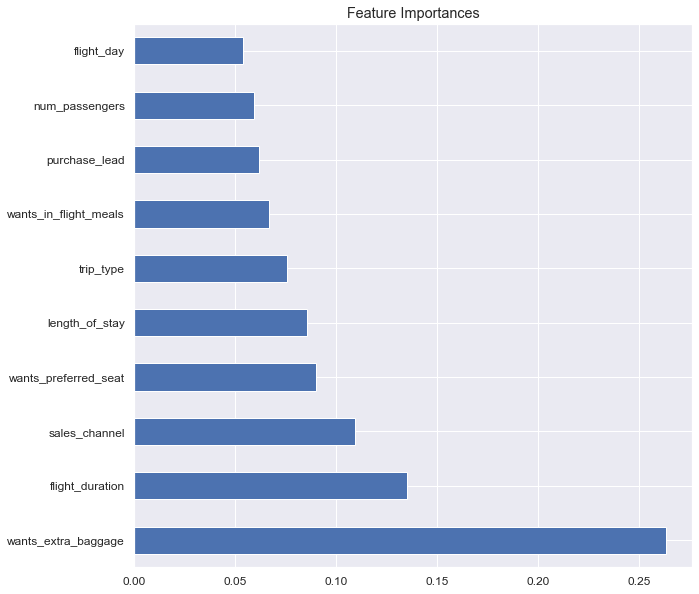

In [33]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

<h4> Plot Tree </h4>

In [34]:
X.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration'], dtype='object')

<h4> Cross - validation </h4>

In [35]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')
cv.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished


0.61184

<h4> Table Formatted View </h4>

In [36]:
table = X_test.copy()
table["True Value"] = y_test.copy()
table["Predicted"] = np.round(y_pred,2)
table

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,True Value,Predicted
11841,2,0,1,33,20,2,1,1,1,8.83,0,0
19602,1,0,1,115,137,5,1,0,0,8.83,1,0
45519,1,0,1,14,6,4,0,0,0,6.42,0,0
25747,1,0,1,1,2,1,1,1,0,4.75,0,0
42642,1,0,1,47,6,6,0,0,1,7.57,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25091,1,0,1,31,20,7,1,1,1,8.58,0,0
27853,1,0,1,69,3,1,0,1,0,7.57,0,0
47278,2,0,1,94,6,4,0,0,0,6.62,0,0
37020,1,0,1,62,5,2,1,0,1,8.83,0,0
